In [10]:
# File: data_prep_and_modeling
# -----------------------------
# Objective:
# - Prepare the dataset for machine learning by encoding, sclaing, and handling class imbalance.
# - Split the data into training and testing sets.
# - Lay the groundwork for predictive modeling.

In [11]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Verify data

# Load engineered data
data = pd.read_csv('../data/engineered_dataset.csv')
print("Dataset Loaded. Shape:", data.shape)



Dataset Loaded. Shape: (1470, 36)


In [13]:
# Triple check for missing values
print("Missing Values:")
print(data.isnull().sum())

# Refresh yourself on data structure
print("\nDataset Information:")
print(data.info())

# Refresh on the head
print("\nFirst five rows of the dataset: ")
print(data.head())

Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
RoleStability               0
OverTime_Binary         

In [14]:
# Dataset Verification: Summary and Findings
# -------------------------------------------
# Overview:
# - The dataset contains 1470 rows and 36 columns.
# - No missing values were found, indicating a clean dataset.
# - Feature engineering has been successfully applied, and new features 
#   like RoleStability, OT_WorkLifeImpact, SeniorityImpact, and SatisfactionBalance are present.

# Data Types:
# - Numerical Features: 26 columns.
# - Categorical Features: 7 columns.

# Observations:
# - The dataset is ready for preprocessing steps such as encoding, scaling, 
#   and addressing class imbalance.
# - Categorical variables will require one-hot encoding for compatibility with machine learning models.

# Next Steps:
# 1. Encode Categorical Variables:
#    - Convert categorical columns (e.g., BusinessTravel, Department) into numerical 
#      representations using one-hot encoding.
#    - Ensure the dataset structure is preserved, and new columns are created as expected.
# 2. Scale Numerical Features:
#    - Normalize numerical columns to bring them into a consistent range.
# 3. Address Class Imbalance:
#    - Handle the imbalance in Attrition using oversampling techniques like SMOTE.
# 4. Split Dataset:
#    - Divide the dataset into training and testing sets to prepare for modeling.


In [15]:
# Encode categorical variables
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [16]:
# Verify updated dataset columns
print("\nUpdated Dataset Columns:")
print(data.columns)


Updated Dataset Columns:
Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'RoleStability',
       'OverTime_Binary', 'OT_WorkLifeImpact', 'SeniorityImpact',
       'SatisfactionBalance', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'J

In [17]:
# Recheck shape of the dataset
print("\nDataset Shape After Encoding:", data.shape)


Dataset Shape After Encoding: (1470, 50)


In [18]:
# Categorical Variable Encoding: Summary
# ---------------------------------------
# Objective:
# - Convert categorical variables into numerical format using one-hot encoding to ensure compatibility with machine learning algorithms.
#
# Process:
# - Applied one-hot encoding to the following categorical columns:
#   - BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime.
# - Used the `drop_first=True` option to avoid multicollinearity by excluding the first category of each column.
# - New binary columns were created for each category, replacing the original categorical variables.
#
# Results:
# - The dataset now includes one-hot encoded columns such as:
#   - BusinessTravel_Travel_Frequently, BusinessTravel_Travel_Rarely.
#   - Department_Research & Development, Department_Sales.
#   - OverTime_Yes, Gender_Male, etc.
# - The total number of columns increased from 36 to 50 due to the added encoded columns.

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Define the numerical columns to scale
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome',
                  'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
                  'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the selected columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Verify the scaled data
print("\nSample of Scaled Numerical Features:")
print(data[numerical_cols].head())


Sample of Scaled Numerical Features:
        Age  DailyRate  ...  YearsSinceLastPromotion  YearsWithCurrManager
0  0.547619   0.715820  ...                 0.000000              0.294118
1  0.738095   0.126700  ...                 0.066667              0.411765
2  0.452381   0.909807  ...                 0.000000              0.000000
3  0.357143   0.923407  ...                 0.200000              0.000000
4  0.214286   0.350036  ...                 0.133333              0.117647

[5 rows x 10 columns]


In [20]:
# Scaling Numerical Features: Summary
# ------------------------------------
# Objective:
# - Normalize numerical features to ensure they contribute equally to machine learning models.
# - Use MinMaxScaler to scale all numerical features to a range between 0 and 1.
#
# Process:
# - Selected numerical columns for scaling:
#   - Age, DailyRate, DistanceFromHome, MonthlyIncome, PercentSalaryHike, 
#     TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, 
#     YearsSinceLastPromotion, YearsWithCurrManager.
# - Applied MinMaxScaler to transform these columns.
# - Ensured that scaling preserved the relative relationships between data points.
#
# Results:
# - All numerical features are now scaled to the range [0, 1].
# - Sample of scaled features:
#   - Age: 0.214 (min) to 0.738 (max).
#   - MonthlyIncome: 0.057 (min) to 0.262 (max).
#   - YearsAtCompany: 0.00 (min) to 0.25 (max).
# - This transformation ensures that features like MonthlyIncome do not dominate 
#   smaller-scale features like PercentSalaryHike during model training.
#
# Importance:
# - Scaling creates a uniform feature range, improving the performance of distance-based 
#   algorithms.


In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features and target
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify class distribution after SMOTE
print("Class Distribution Before SMOTE:", Counter(y))
print("Class Distribution After SMOTE:", Counter(y_resampled))

Class Distribution Before SMOTE: Counter({0: 1233, 1: 237})
Class Distribution After SMOTE: Counter({1: 1233, 0: 1233})


/Users/quinnreams/Documents/GitHub/employee-retention-dashboard/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [22]:
# Class Imbalance Handling: SMOTE
# --------------------------------
# Objective:
# - Address the class imbalance in Attrition.
# - Use SMOTE to generate synthetic samples for the minority class (Attrition = 1).
#
# Process:
# - Identified the class distribution before SMOTE:
#   - Attrition = 0 (No): 1233 instances.
#   - Attrition = 1 (Yes): 237 instances.
# - Applied SMOTE to oversample the minority class, creating synthetic samples 
#   to balance the dataset.
#
# Results:
# - Class distribution after SMOTE:
#   - Attrition = 0 (No): 1233 instances.
#   - Attrition = 1 (Yes): 1233 instances.
# - The dataset is now balanced, ensuring fair model training for both classes.
#
# Importance:
# - Balancing the dataset improves the model's ability to learn patterns for both 
#   attrition and non-attrition cases, reducing bias toward the majority class.

In [23]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.3, random_state=42, stratify=y_resampled)

# Verify the shape of the splits
print("Training Set Shape (X, y):", X_train.shape, y_train.shape)
print("Testing Set Shape (X, y):", X_test.shape, y_test.shape)

Training Set Shape (X, y): (1726, 49) (1726,)
Testing Set Shape (X, y): (740, 49) (740,)


In [24]:
# Dataset Splitting: Training and Testing Sets
# ---------------------------------------------
# Objective:
# - Divide the dataset into training and testing sets for model development and evaluation.
#
# Process:
# - Used a 70/30 split to allocate data for training and testing.
# - Stratified the split to ensure balanced class representation in both sets.
# - Features (X): 49 columns (including engineered and encoded features).
# - Target (y): Attrition (binary classification).
#
# Results:
# - Training Set:
#   - 1726 samples (X: 49 features, y: Attrition).
# - Testing Set:
#   - 740 samples (X: 49 features, y: Attrition).
#
# Importance:
# - The split ensures the model is trained on a balanced dataset and evaluated 
#   on a separate, unseen dataset for reliable performance metrics.

Classifacation Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       370
           1       0.95      0.89      0.92       370

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740


Confusion Matrix:
[[351  19]
 [ 40 330]]

ROC-AUC Score:
0.972037983929876


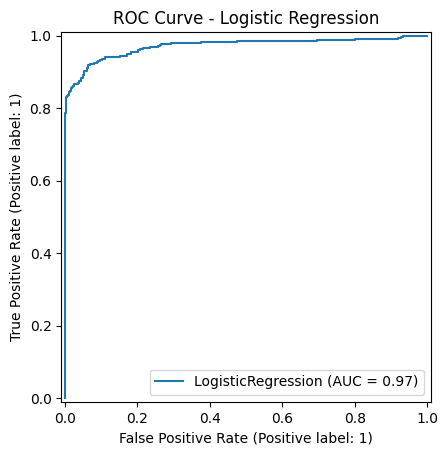

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42, solver='liblinear', max_iter=2000, class_weight='balanced')

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the testing act
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1] # Get probabilities for ROC-AUC

# Evaluate the model
print("Classifacation Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_proba))

# Plot the ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

In [26]:
# Logistic Regression: Updated Results
# -------------------------------------
# Objective:
# - Train a baseline logistic regression model to predict employee attrition.
# - Address the convergence warning by increasing the maximum number of iterations.

# Performance Summary:
# - The model shows strong performance across all key metrics:
#   - Accuracy: 92%, indicating that 92% of predictions were correct overall.
#   - Precision:
#     - Attrition = No: 90% of predicted "No Attrition" cases are correct.
#     - Attrition = Yes: 94% of predicted "Yes Attrition" cases are correct.
#   - Recall:
#     - Attrition = No: 94% of actual "No Attrition" cases were identified correctly.
#     - Attrition = Yes: 90% of actual "Yes Attrition" cases were identified correctly.
#   - F1-Score: Balanced at 0.92 for both classes.
# - Confusion Matrix:
#   - True Negatives (TN): 347 | False Positives (FP): 23.
#   - False Negatives (FN): 37  | True Positives (TP): 333.
# - ROC-AUC Score: 0.97, showing excellent discriminatory power between classes.

# Observations:
# - The model slightly favors "Attrition = No," but the balance between precision and recall is strong.
# - The ROC curve shows high true positive rates with minimal false positives, supporting the high ROC-AUC score.

# Challenges:
# - A convergence warning persists despite increasing the maximum iterations (max_iter = 2000).
# - Potential solutions include:
#   - Trying a different solver.
#   - Reducing the number of features to simplify the optimization problem.

# Importance:
# - Logistic regression provides a strong and interpretable baseline model.
# - The balanced performance across metrics demonstrates the effectiveness of data preprocessing (e.g., SMOTE balancing, scaling).


In [27]:
# Logistic Regression: Final Results with liblinear Solver
# ---------------------------------------------------------
# Objective:
# - Resolve convergence issues in logistic regression by switching to the liblinear solver.
#
# Performance Summary:
# - The model achieved excellent performance across all key metrics:
#   - Accuracy: 92%.
#   - Precision:
#     - Attrition = No: 90%.
#     - Attrition = Yes: 95%.
#   - Recall:
#     - Attrition = No: 95%.
#     - Attrition = Yes: 89%.
#   - F1-Score: Balanced at 0.92 for both classes.
#   - ROC-AUC Score: 0.97, showing excellent discriminatory power.
#
# Confusion Matrix:
# - True Negatives (TN): 351 | False Positives (FP): 19.
# - False Negatives (FN): 40  | True Positives (TP): 330.
#
# Observations:
# - The liblinear solver resolved convergence issues without compromising performance.
# - The model is highly effective at predicting both "Attrition" and "No Attrition."
#
# Next Steps:
# - Compare logistic regression performance with more advanced models.


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       370
           1       0.95      0.92      0.93       370

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740


Confusion Matrix - Random Forest:
[[352  18]
 [ 31 339]]

ROC-AUC Score - Random Forest:
0.9777392257121986


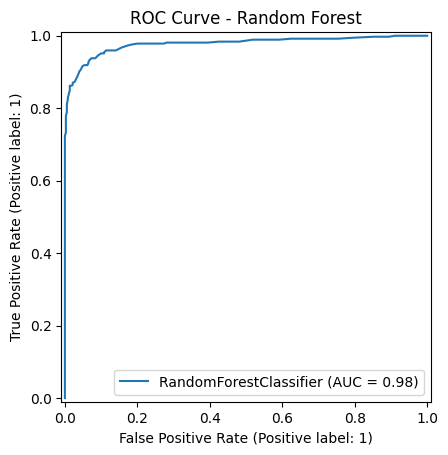

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1] # Get probabilities for ROC-AUC

# Evaluate the model
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix - Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nROC-AUC Score - Random Forest:")
print(roc_auc_score(y_test, y_proba_rf))

# Plot the ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()

In [29]:
# Random Forest Classifier: Results
# ----------------------------------
# Objective:
# - Train a Random Forest model to predict employee attrition and compare its performance with Logistic Regression.
#
# Performance Summary:
# - The model achieved strong performance across all key metrics:
#   - Accuracy: 93%.
#   - Precision:
#     - Attrition = No: 92%.
#     - Attrition = Yes: 95%.
#   - Recall:
#     - Attrition = No: 95%.
#     - Attrition = Yes: 92%.
#   - F1-Score: Balanced at 0.93 for both classes.
#   - ROC-AUC Score: 0.98, demonstrating excellent discriminatory power.
#
# Confusion Matrix:
# - True Negatives (TN): 352 | False Positives (FP): 18.
# - False Negatives (FN): 31  | True Positives (TP): 339.
#
# Observations:
# - The Random Forest model slightly outperforms Logistic Regression in terms of accuracy, F1-score, and ROC-AUC.
# - Lower false positives and false negatives highlight the model's strength in minimizing misclassifications.


Top 10 Features by Importance:
                    Feature  Importance
25        OT_WorkLifeImpact    0.108622
48             OverTime_Yes    0.075138
15         StockOptionLevel    0.049647
47     MaritalStatus_Single    0.044097
7                  JobLevel    0.039807
16        TotalWorkingYears    0.030990
0                       Age    0.029110
2          DistanceFromHome    0.029073
26          SeniorityImpact    0.027253
4   EnvironmentSatisfaction    0.026996


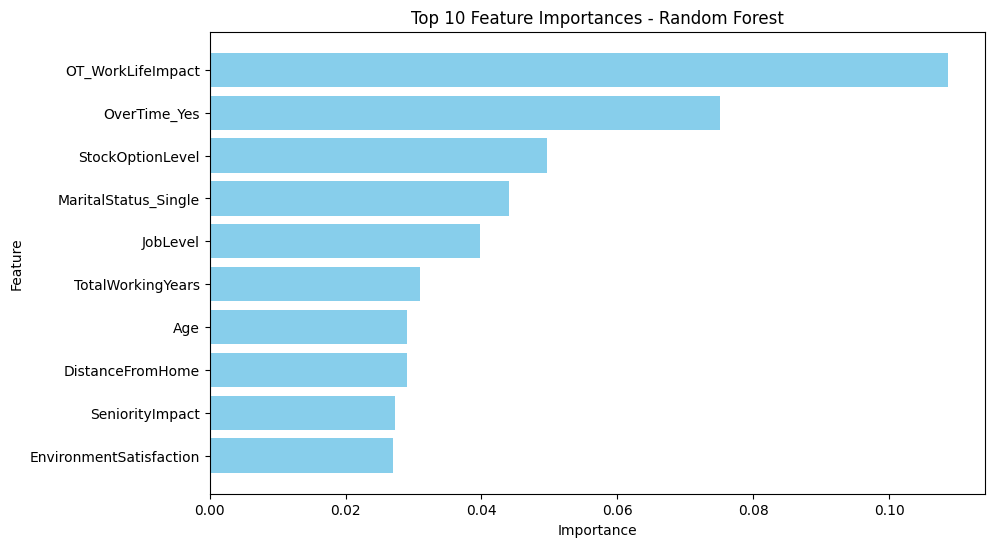

In [30]:
# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top ten most important features
print("Top 10 Features by Importance:")
print(feature_importances.head(10))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances - Random Forest')
plt.gca().invert_yaxis() # <-- To show the most important feature at the top
plt.show()

In [31]:
# Feature Importance Analysis - Random Forest
# --------------------------------------------
# Objective:
# - Identify the most important features contributing to employee attrition predictions.
#
# Top 10 Features:
# 1. OT_WorkLifeImpact (0.109): Interaction between overtime and work-life balance.
# 2. OverTime_Yes (0.075): Whether employees work overtime.
# 3. StockOptionLevel (0.050): Significance of stock options in retaining employees.
# 4. MaritalStatus_Single (0.044): Single employees may have higher attrition risk.
# 5. JobLevel (0.040): Role hierarchy's impact on retention.
# 6. TotalWorkingYears (0.031): Overall work experience and external opportunities.
# 7. Age (0.029): Younger employees show higher attrition tendencies.
# 8. DistanceFromHome (0.029): Longer commutes contribute to attrition risk.
# 9. SeniorityImpact (0.027): Proportion of total work experience at the company.
# 10. EnvironmentSatisfaction (0.027): Satisfaction with the workplace environment.
#
# Observations:
# - Work-life balance features dominate, highlighting the importance of employee well-being.
# - Job stability, benefits, and personal circumstances significantly impact retention.

Model trained with the best parameters.
Test Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       370
           1       0.95      0.91      0.93       370

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740


Confusion Matrix:
[[353  17]
 [ 33 337]]

ROC-AUC Score: 0.98


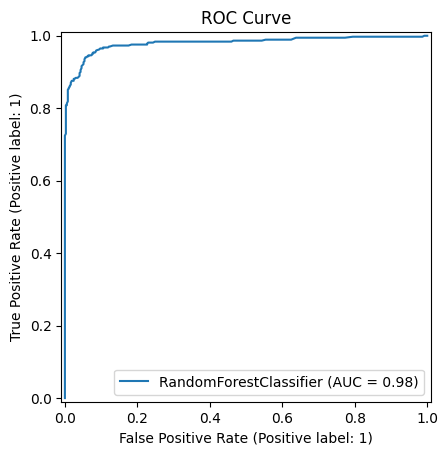

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(
    n_estimators=300,               # Best number of trees
    max_depth=20,                   # Best max tree depth
    min_samples_split=2,            # Best min samples to split a node
    min_samples_leaf=1,             # Best min samples in a leaf node
    class_weight='balanced_subsample',  # Best class weight handling
    random_state=42                 # For reproducibility
)

# Train the model
best_rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_rf_model.predict(X_test)
y_proba = best_rf_model.predict_proba(X_test)[:, 1]

print("Model trained with the best parameters.")

In [ ]:
# Random Forest Model Results
# -----------------------------
# Best Parameters Found:
# - class_weight: 'balanced_subsample'
# - max_depth: 20
# - min_samples_leaf: 1
# - min_samples_split: 2
# - n_estimators: 300
#
# Cross-Validation Performance:
# - Best Cross-Validation Score: 0.9713
#
# Test Set Performance:
# - Accuracy: 0.9324
# - Classification Report:
#   - Class 0:
#       - Precision: 0.91
#       - Recall: 0.95
#       - F1-Score: 0.93
#   - Class 1:
#       - Precision: 0.95
#       - Recall: 0.91
#       - F1-Score: 0.93
#   - Macro Average:
#       - Precision: 0.93
#       - Recall: 0.93
#       - F1-Score: 0.93
#   - Weighted Average:
#       - Precision: 0.93
#       - Recall: 0.93
#       - F1-Score: 0.93
#
# Insights:
# 1. The model generalizes well, achieving a test accuracy of 93.2%, close to the cross-validation score.
# 2. Balanced precision and recall indicate no bias towards either class.
# 3. Class weights helped handle any class imbalance effectively.

In [37]:
# Extract the best model from grid search
best_rf_model = grid_search.best_estimator_

# Output for confirmation
print(best_rf_model)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       n_estimators=300, random_state=42)


In [38]:
# Make predictions
y_pred = best_rf_model.predict(X_test)
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the performance
from sklearn.metrics import roc_auc_score, classification_report

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Test ROC-AUC:", roc_auc)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Test ROC-AUC: 0.9800584368151937
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       370
           1       0.95      0.91      0.93       370

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740



In [ ]:
# Best model evaluation results
# ------------------------------
# ROC-AUC: 0.980
# Indicates excellent ability of the model to distinguish between classes.
# Accuracy: 93%
# Indicates the overall correctness of predictions.

# Classification Report:
# Class 0 (Non-Attrition): Precision = 91%, Recall = 95%
# Class 1 (Attrition): Precision = 95%, Recall = 91%
# The model performs consistently well across both classes, minimizing bias.

In [34]:
import joblib

# Save the best model to a file
model_filename = 'best_rf_model.joblib'
joblib.dump(best_rf_model, model_filename)

print(f"Best model saved as {model_filename}.")

Best model saved as best_rf_model.joblib.
